In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from astropy.coordinates import SkyCoord
from astropy import units as u

In [221]:
table = pd.read_csv("M52.tsv" , comment= '#' , delimiter= ';')

In [222]:
table

,No,Xpos,Ypos,Vmag,e_Vmag,B-V,V-I,U-B,e_Imag,e_Bmag,e_Umag,chi,Sharp,r,_RA,_DE
0,1,859.52,749.70,16.184,0.012,0.933,1.255,0.282,0.026,0.018,0.022,0.69,-0.085,6.970,351.13283,61.56689
1,2,846.39,756.64,18.772,0.080,1.313,1.638,,0.030,0.050,,0.47,-0.067,8.767,351.14429,61.56982
2,3,863.96,754.34,19.519,0.157,1.313,1.662,,0.067,0.117,,0.46,0.098,8.980,351.12892,61.56882
3,4,851.90,764.30,18.554,0.067,1.210,1.582,0.072,0.042,0.047,0.149,0.50,0.056,9.800,351.13943,61.57300
4,5,860.27,765.22,18.210,0.048,0.860,1.304,0.463,0.049,0.027,0.232,0.49,0.148,11.496,351.13209,61.57336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17857,17858,2.40,1564.13,17.566,0.028,0.893,1.504,0.570,0.044,0.035,0.131,0.43,0.008,1175.422,351.88753,61.90624
17858,17859,27.59,1598.09,19.286,0.143,1.921,1.239,,0.096,0.125,,0.59,0.116,1181.275,351.86541,61.92046
17859,17860,15.72,1592.49,17.814,0.040,1.149,1.560,0.518,0.034,0.028,0.160,0.60,0.156,1185.656,351.87589,61.91810
17860,17861,6.97,1586.94,18.635,0.079,1.394,1.474,0.004,0.045,0.068,0.273,0.57,0.087,1187.975,351.88361,61.91576


In [223]:
table.dtypes

No          int64
Xpos      float64
Ypos      float64
Vmag      float64
e_Vmag    float64
B-V        object
V-I        object
U-B        object
e_Imag     object
e_Bmag     object
e_Umag     object
chi       float64
Sharp     float64
r         float64
_RA       float64
_DE       float64
dtype: object

In [224]:
len(table)

17862

In [213]:
table.Vmag = pd.to_numeric(table.Vmag, errors="coerce")

In [225]:
stars = table[table.Vmag <= 14]

In [226]:
len(stars)

422

In [216]:
ra_str = stars['RAICRS'].str.strip().str.replace(r"\s+", ":", regex=True)
dec_str = stars['DEICRS'].str.strip().str.replace(r"\s+", ":", regex=True)

coords = SkyCoord(ra=ra_str, dec=dec_str, unit=(u.hourangle, u.deg))

stars['RA_deg'] = coords.ra.deg
stars['Dec_deg'] = coords.dec.deg

print(stars[['RA_deg', 'Dec_deg']].head())

        RA_deg    Dec_deg
2   321.314167  47.935278
19  321.266667  48.053056
25  321.251250  48.007222
27  321.246667  47.961389
32  321.241250  47.988611


/var/folders/mp/7xhn2jq112z6td9nlqyw8mvm0000gn/T/ipykernel_30903/1474486190.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stars['RA_deg'] = coords.ra.deg
/var/folders/mp/7xhn2jq112z6td9nlqyw8mvm0000gn/T/ipykernel_30903/1474486190.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stars['Dec_deg'] = coords.dec.deg


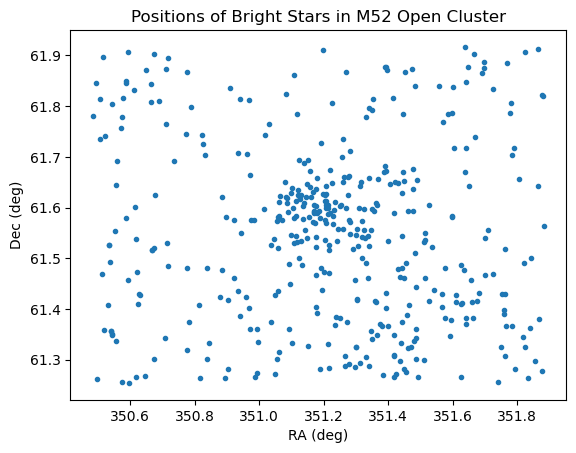

In [228]:
plt.scatter(stars._RA, stars._DE, marker=".")
# plt.ylim(57.6, 58.5)
# plt.xlim(341.15, 342.65)
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")
plt.title("Positions of Bright Stars in M52 Open Cluster")
plt.show()

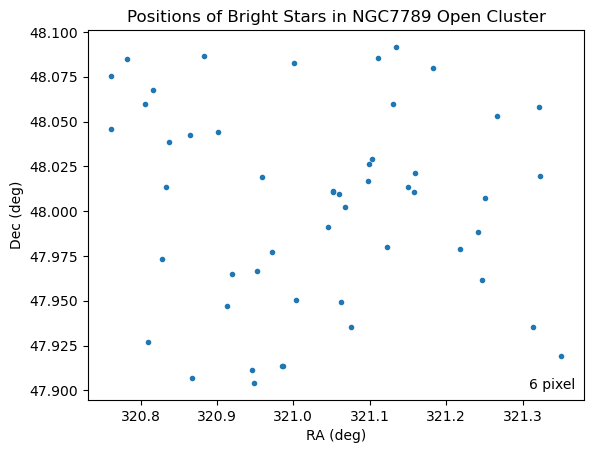

In [220]:
fig, ax = plt.subplots()
ax.scatter(stars.RA_deg, stars.Dec_deg, marker=".")
# ax.set_ylim(57.6, 58.5)
# ax.set_xlim(341.15, 342.65)
# asb = AnchoredSizeBar(ax.transData, 0.1, r"1$^{\prime}$", loc='lower center', pad=0.1, borderpad=0.5, sep=5, frameon=False)
asb = AnchoredSizeBar(ax.transData, 1.8e-4, "6 pixel", loc='lower right', pad=0.1, borderpad=0.5, sep=5, frameon=False)
ax.add_artist(asb)
ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")
ax.set_title("Positions of Bright Stars in NGC7789 Open Cluster")
plt.show()

In [229]:
n7067 = pd.read_csv("NGC7067.tsv" , comment= '#' , delimiter= ';')
n225 = pd.read_csv("NGC225.tsv" , comment= '#' , delimiter= ';')

In [231]:
n7067.dtypes

More       object
ID          int64
RAICRS     object
DEICRS     object
Vmag      float64
e_Vmag    float64
b-y       float64
e_b-y     float64
m1        float64
e_m1      float64
c1         object
e_c1       object
beta       object
e_beta     object
Member      int64
IPHAS      object
2MASS      object
dtype: object

In [232]:
n225.dtypes

ID           int64
RAJ2000     object
DEJ2000     object
Vmag       float64
e_Vmag     float64
U-B         object
e_U-B       object
B-V        float64
e_B-V      float64
pmRA        object
e_pmRA      object
pmDE        object
e_pmDE      object
Pmemb      float64
dtype: object

In [233]:
s7067 = n7067[n7067.Vmag <= 14]
s225 = n225[n225.Vmag <=14]

In [236]:
ra_str = s7067['RAICRS'].str.strip().str.replace(r"\s+", ":", regex=True)
dec_str = s7067['DEICRS'].str.strip().str.replace(r"\s+", ":", regex=True)

coords = SkyCoord(ra=ra_str, dec=dec_str, unit=(u.hourangle, u.deg))

s7067['RA_deg'] = coords.ra.deg
s7067['Dec_deg'] = coords.dec.deg

/var/folders/mp/7xhn2jq112z6td9nlqyw8mvm0000gn/T/ipykernel_30903/2738458871.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s7067['RA_deg'] = coords.ra.deg
/var/folders/mp/7xhn2jq112z6td9nlqyw8mvm0000gn/T/ipykernel_30903/2738458871.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s7067['Dec_deg'] = coords.dec.deg


In [237]:
ra_str = s225['RAJ2000'].str.strip().str.replace(r"\s+", ":", regex=True)
dec_str = s225['DEJ2000'].str.strip().str.replace(r"\s+", ":", regex=True)

coords = SkyCoord(ra=ra_str, dec=dec_str, unit=(u.hourangle, u.deg))

s225['RA_deg'] = coords.ra.deg
s225['Dec_deg'] = coords.dec.deg

/var/folders/mp/7xhn2jq112z6td9nlqyw8mvm0000gn/T/ipykernel_30903/2684841346.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s225['RA_deg'] = coords.ra.deg
/var/folders/mp/7xhn2jq112z6td9nlqyw8mvm0000gn/T/ipykernel_30903/2684841346.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s225['Dec_deg'] = coords.dec.deg


In [238]:
print(len(s7067), len(s225))

51 60


In [241]:
print(s7067.RA_deg.max() - s7067.RA_deg.min())
print(s7067.Dec_deg.max() - s7067.Dec_deg.min())
print(s225.RA_deg.max() - s225.RA_deg.min())
print(s225.Dec_deg.max() - s225.Dec_deg.min())

0.5900000000000318
0.1875
0.7067499999999995
0.3091055555555542


In [242]:
print(s7067.Vmag.max())
print(s7067.Vmag.min())
print(s225.Vmag.max())
print(s225.Vmag.min())

14.0
8.42
13.973
9.713


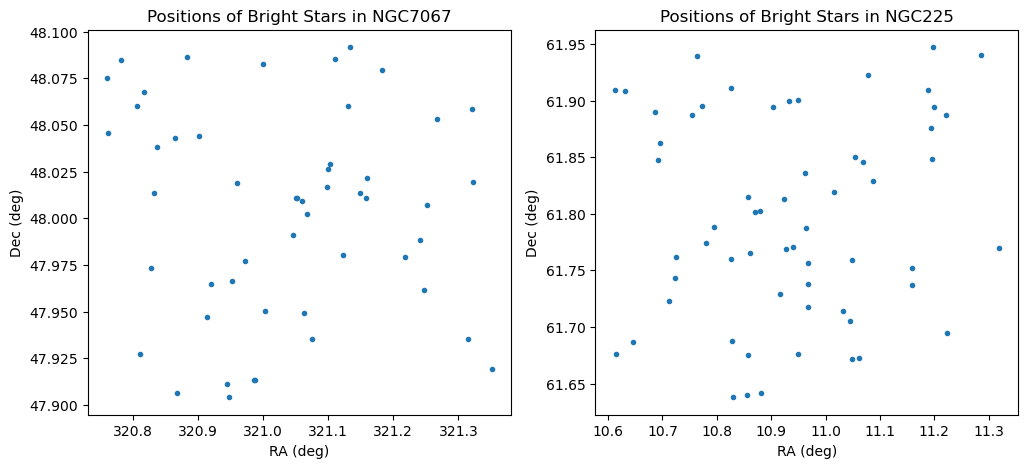

In [249]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(s7067.RA_deg, s7067.Dec_deg, marker=".")
ax2.scatter(s225.RA_deg, s225.Dec_deg, marker=".")

ax1.set_xlabel("RA (deg)")
ax1.set_ylabel("Dec (deg)")
ax2.set_xlabel("RA (deg)")
ax2.set_ylabel("Dec (deg)")

ax1.set_title("Positions of Bright Stars in NGC7067")
ax2.set_title("Positions of Bright Stars in NGC225")
plt.show()

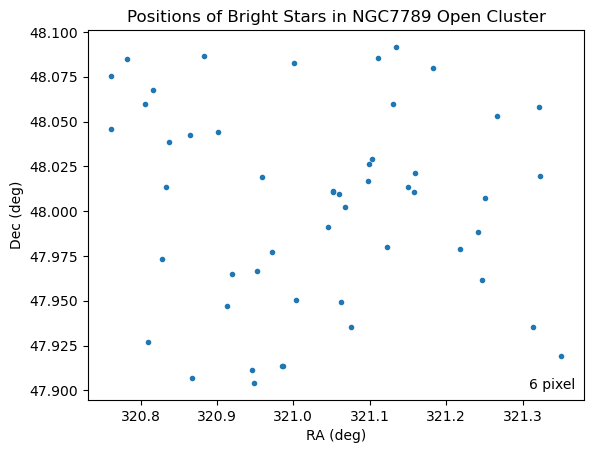

In [ ]:
fig, ax = plt.subplots()
ax.scatter(stars.RA_deg, stars.Dec_deg, marker=".")
# ax.set_ylim(57.6, 58.5)
# ax.set_xlim(341.15, 342.65)
# asb = AnchoredSizeBar(ax.transData, 0.1, r"1$^{\prime}$", loc='lower center', pad=0.1, borderpad=0.5, sep=5, frameon=False)
asb = AnchoredSizeBar(ax.transData, 1.8e-4, "6 pixel", loc='lower right', pad=0.1, borderpad=0.5, sep=5, frameon=False)
ax.add_artist(asb)
ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")
ax.set_title("Positions of Bright Stars in NGC7789 Open Cluster")
plt.show()